# Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler 

# 1. Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/All-inDSBootcamp/Telco_Customer_Churn_Dataset.csv')

In [ ]:
df.shape

(7047, 21)

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2. Data Cleaning

### 2.1 Data Types Validation

In [ ]:
df['MonthlyCharges'].dtypes

dtype('float64')

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df['TotalCharges'].iloc[492]

' '

In [ ]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

ValueError: ignored

In [ ]:
df['TotalCharges'].dtypes

dtype('float64')

In [ ]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce') 

### 2.2 Missing Values

In [ ]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService     12
OnlineSecurity      14
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

##### handling missing values

In [ ]:
cat_cols = ['InternetService','OnlineSecurity']
for col in cat_cols:
  df[col]= df[col].fillna(df[col].mode()[0])

In [ ]:
df[cat_cols].isnull().sum()

InternetService    0
OnlineSecurity     0
dtype: int64

In [ ]:
df['TotalCharges']=df['TotalCharges'].fillna(df[['TotalCharges']].median()[0])

In [ ]:
df['TotalCharges'].isnull().sum()

0

### 2.3 Duplicates

In [ ]:
duplicate= df[df.duplicated(keep=False)]
duplicate

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
86,4808-YNLEU,Female,0,Yes,No,35,Yes,No,DSL,Yes,...,No,No,Yes,No,One year,Yes,Bank transfer (automatic),62.15,2215.45,No
105,4808-YNLEU,Female,0,Yes,No,35,Yes,No,DSL,Yes,...,No,No,Yes,No,One year,Yes,Bank transfer (automatic),62.15,2215.45,No
124,6207-WIOLX,Female,0,Yes,Yes,25,No,No phone service,DSL,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),58.60,1502.65,Yes
133,6207-WIOLX,Female,0,Yes,Yes,25,No,No phone service,DSL,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),58.60,1502.65,Yes
187,2604-IJPDU,Female,0,Yes,No,20,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,96.55,1901.65,No
198,2604-IJPDU,Female,0,Yes,No,20,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,96.55,1901.65,No
237,7301-ABVAD,Female,0,No,No,72,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),86.60,6350.50,No
244,7301-ABVAD,Female,0,No,No,72,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),86.60,6350.50,No


In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.shape

(7043, 21)

### 2.4 Outliers

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.918412
std,0.368612,24.559481,30.090047,2265.269819
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1398.425000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


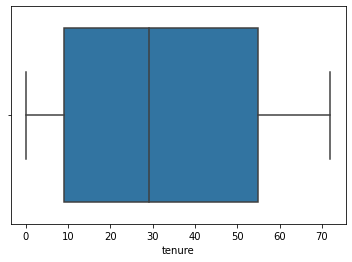

In [ ]:
sns.boxplot(df['tenure'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


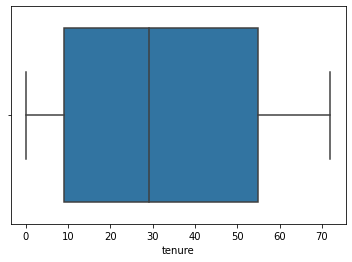

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


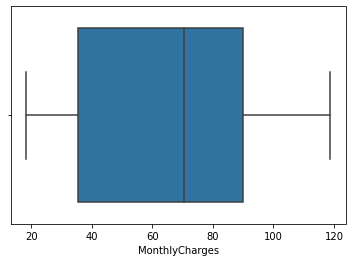

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


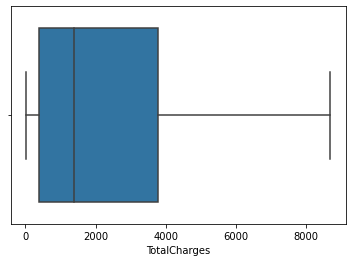

In [ ]:
df1 = df.select_dtypes(['int','float'])
df1 = df1.drop('SeniorCitizen',axis=1)
for col in df1.columns:
  plt.figure()
  ax= sns.boxplot(df[col])
  plt.show()

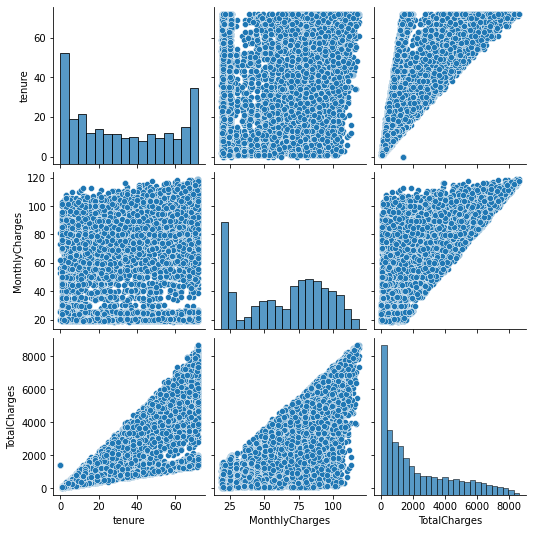

In [ ]:
sns.pairplot(df1)

# 3. Exploratory Data Analytics (EDA)

## 3.1 Basic Statistic

### 3.1.1 Univariate

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
print("Mean of MonthlyCharges:")
print(df['MonthlyCharges'].mean())

Mean of MonthlyCharges:
64.76169246059918


In [ ]:
print("Mean of TotalCharges:")
print(df['TotalCharges'].mean())

Mean of TotalCharges:
2281.918411898339


In [ ]:
df.mean(numeric_only=True)

SeniorCitizen        0.162147
tenure              32.371149
MonthlyCharges      64.761692
TotalCharges      2281.918412
dtype: float64

In [ ]:
print("Median of MonthlyCharges:")
print(df['MonthlyCharges'].median())

Median of MonthlyCharges:
70.35


In [ ]:
print("Median of TotalCharges:")
print(df['TotalCharges'].median())

Median of TotalCharges:
1398.425


In [ ]:
df.median(numeric_only=True)

SeniorCitizen        0.000
tenure              29.000
MonthlyCharges      70.350
TotalCharges      1398.425
dtype: float64

In [ ]:
df.mode().iloc[0]

customerID                0002-ORFBO
gender                          Male
SeniorCitizen                    0.0
Partner                           No
Dependents                        No
tenure                           1.0
PhoneService                     Yes
MultipleLines                     No
InternetService          Fiber optic
OnlineSecurity                    No
OnlineBackup                      No
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                 20.05
TotalCharges                    20.2
Churn                             No
Name: 0, dtype: object

In [ ]:
print("Standard Deviation: ")
print(df.std(numeric_only=True))

Standard Deviation: 
SeniorCitizen        0.368612
tenure              24.559481
MonthlyCharges      30.090047
TotalCharges      2265.269819
dtype: float64


In [ ]:
print("Variance: ")
print(df.var(numeric_only=True))

Variance: 
SeniorCitizen     1.358745e-01
tenure            6.031681e+02
MonthlyCharges    9.054109e+02
TotalCharges      5.131447e+06
dtype: float64


In [ ]:
min = df.min()
max = df.max()
for col in df.select_dtypes(['int','float']).columns:
  print(col,":[", df[col].min(), ",", df[col].max(),"]")

SeniorCitizen :[ 0 , 1 ]
tenure :[ 0 , 72 ]
MonthlyCharges :[ 18.25 , 118.75 ]
TotalCharges :[ 18.8 , 8684.8 ]


In [ ]:
print("Quantile")
print(df.quantile([0.25, 0.5, 0.75]))

Quantile
      SeniorCitizen  tenure  MonthlyCharges  TotalCharges
0.25            0.0     9.0           35.50       402.225
0.50            0.0    29.0           70.35      1398.425
0.75            0.0    55.0           89.85      3786.600


### 3.1.2 Multivariate

In [ ]:
print(df.corr())

                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.016567        0.220173      0.102651
tenure               0.016567  1.000000        0.247900      0.825463
MonthlyCharges       0.220173  0.247900        1.000000      0.650864
TotalCharges         0.102651  0.825463        0.650864      1.000000


In [ ]:
g1 = df.groupby(['Churn'])['tenure','MonthlyCharges','TotalCharges'].mean()
g1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,tenure,MonthlyCharges,TotalCharges
Churn,,,
No,37.569965,61.265124,2552.884514
Yes,17.979133,74.441332,1531.796094


## 3.2 Data visualization

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### 3.2.1 Univaries

Male      3555
Female    3488
Name: gender, dtype: int64


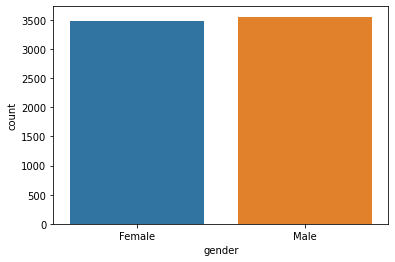

In [ ]:
print(df['gender'].value_counts())
sns.countplot(data=df , x ='gender')

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


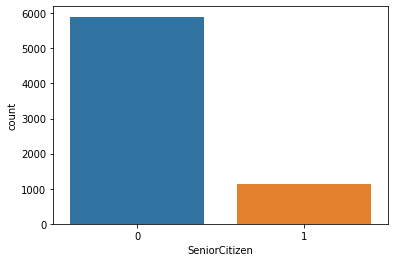

In [ ]:
print(df['SeniorCitizen'].value_counts())
sns.countplot(data=df , x ='SeniorCitizen')

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


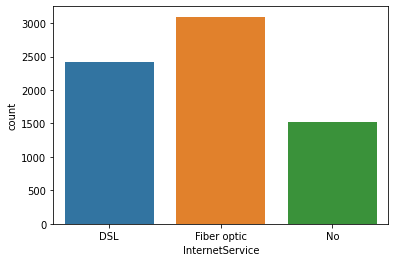

In [ ]:
print(df['InternetService'].value_counts())
sns.countplot(data=df , x ='InternetService')

No     5174
Yes    1869
Name: Churn, dtype: int64


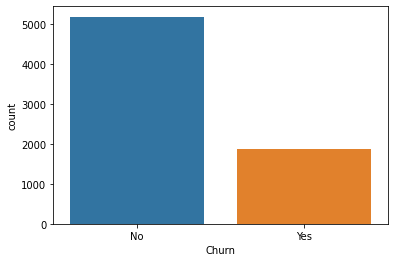

In [ ]:
print(df['Churn'].value_counts())
sns.countplot(data=df , x ='Churn')

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64


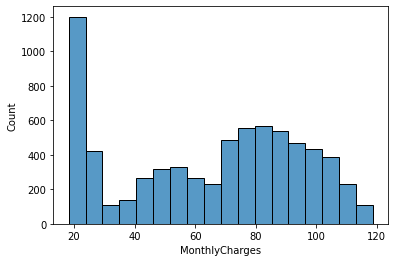

In [ ]:
print(df['MonthlyCharges'].value_counts())
sns.histplot(data=df , x ='MonthlyCharges')

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


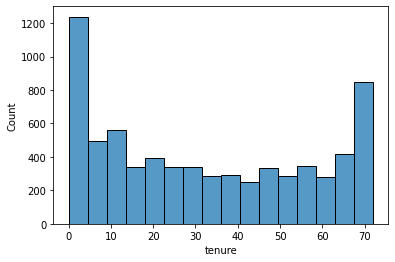

In [ ]:
print(df['tenure'].value_counts())
sns.histplot(data=df , x ='tenure')

1398.425    11
20.200      11
19.750       9
20.050       8
19.900       8
            ..
6849.400     1
692.350      1
130.150      1
3211.900     1
6844.500     1
Name: TotalCharges, Length: 6531, dtype: int64


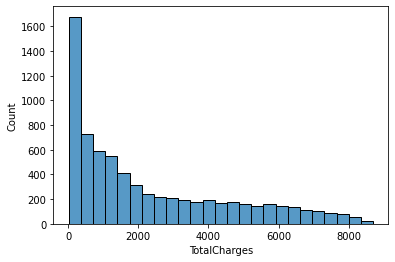

In [ ]:
print(df['TotalCharges'].value_counts())
sns.histplot(data=df , x ='TotalCharges')

### 3.2.2 Multivaries

Male      3555
Female    3488
Name: gender, dtype: int64


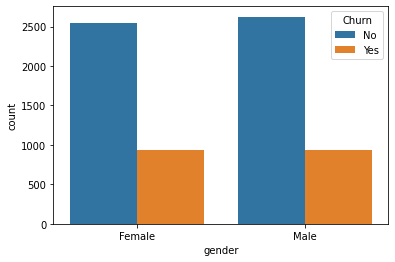

In [ ]:
print(df['gender'].value_counts())
sns.countplot(data=df , x ='gender', hue ='Churn')

### 3.2.3 Other

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


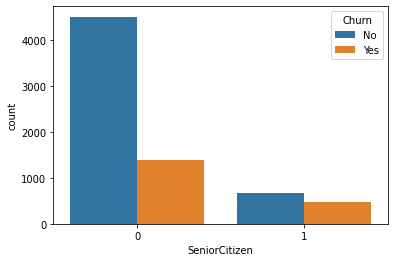

In [ ]:
print(df['SeniorCitizen'].value_counts())
sns.countplot(data=df , x ='SeniorCitizen', hue ='Churn')

No     3641
Yes    3402
Name: Partner, dtype: int64


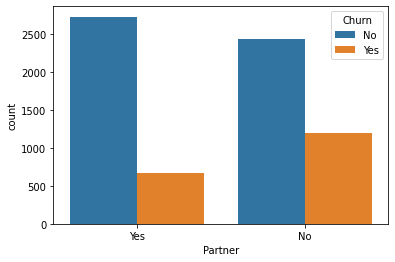

In [ ]:
print(df['Partner'].value_counts())
sns.countplot(data=df , x ='Partner', hue ='Churn')

No     4933
Yes    2110
Name: Dependents, dtype: int64


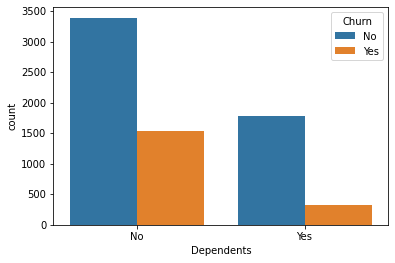

In [ ]:
print(df['Dependents'].value_counts())
sns.countplot(data=df , x ='Dependents', hue ='Churn')

Yes    6361
No      682
Name: PhoneService, dtype: int64


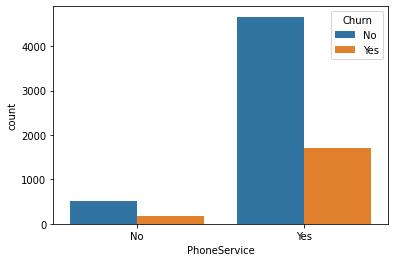

In [ ]:
print(df['PhoneService'].value_counts())
sns.countplot(data=df , x ='PhoneService', hue ='Churn')

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


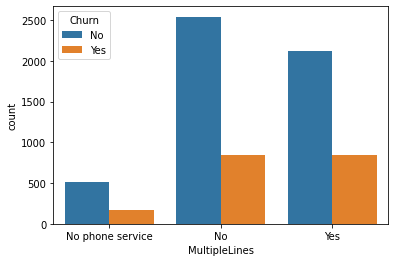

In [ ]:
print(df['MultipleLines'].value_counts())
sns.countplot(data=df , x ='MultipleLines', hue ='Churn')

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


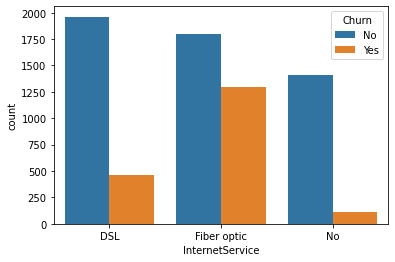

In [ ]:
print(df['InternetService'].value_counts())
sns.countplot(data=df , x ='InternetService', hue ='Churn')

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


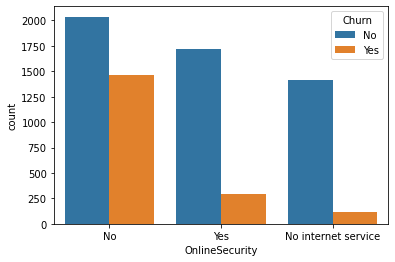

In [ ]:
print(df['OnlineSecurity'].value_counts())
sns.countplot(data=df , x ='OnlineSecurity', hue ='Churn')

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


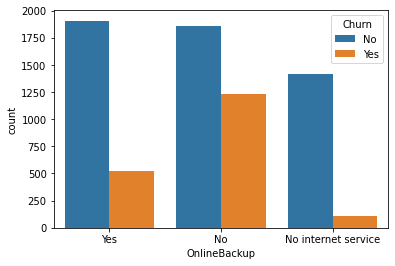

In [ ]:
print(df['OnlineBackup'].value_counts())
sns.countplot(data=df , x ='OnlineBackup', hue ='Churn')

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


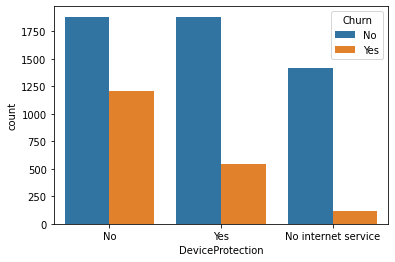

In [ ]:
print(df['DeviceProtection'].value_counts())
sns.countplot(data=df , x ='DeviceProtection', hue ='Churn')

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


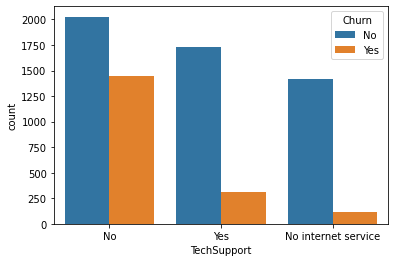

In [ ]:
print(df['TechSupport'].value_counts())
sns.countplot(data=df , x ='TechSupport', hue ='Churn')

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


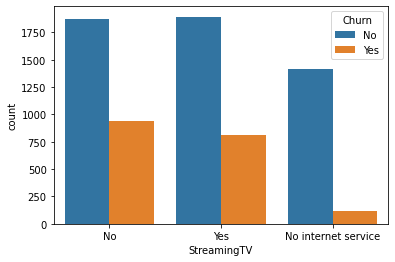

In [ ]:
print(df['StreamingTV'].value_counts())
sns.countplot(data=df , x ='StreamingTV', hue ='Churn')

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


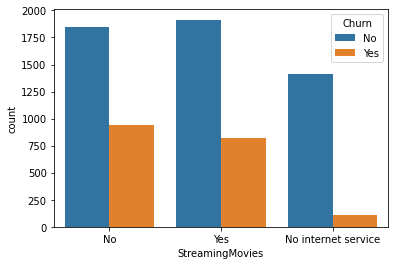

In [ ]:
print(df['StreamingMovies'].value_counts())
sns.countplot(data=df , x ='StreamingMovies', hue ='Churn')

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


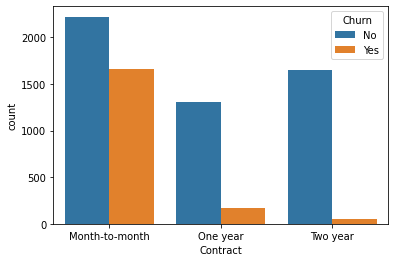

In [ ]:
print(df['Contract'].value_counts())
sns.countplot(data=df , x ='Contract', hue ='Churn')

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


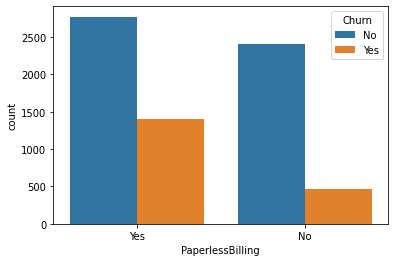

In [ ]:
print(df['PaperlessBilling'].value_counts())
sns.countplot(data=df , x ='PaperlessBilling', hue ='Churn')

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


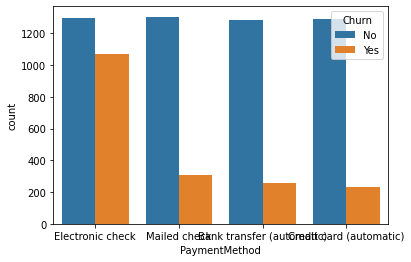

In [ ]:
print(df['PaymentMethod'].value_counts())
sns.countplot(data=df , x ='PaymentMethod', hue ='Churn')

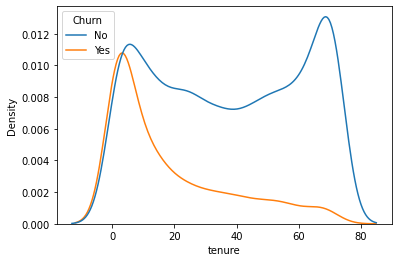

In [ ]:
sns.kdeplot(data = df, x = 'tenure', hue = 'Churn')

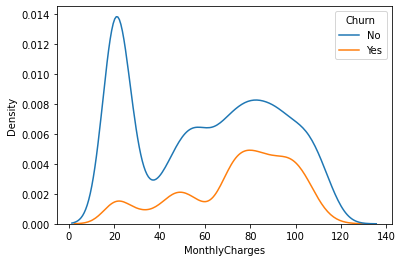

In [ ]:
sns.kdeplot(data = df, x = 'MonthlyCharges', hue = 'Churn')

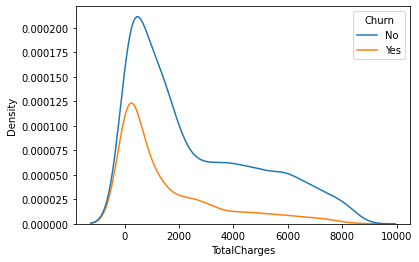

In [ ]:
sns.kdeplot(data = df, x = 'TotalCharges', hue = 'Churn')

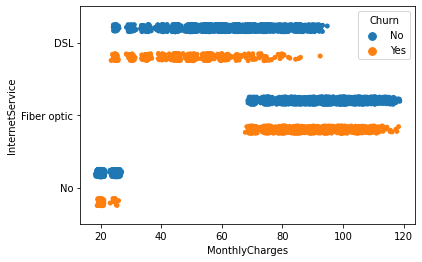

In [ ]:
sns.stripplot(data = df, x = 'MonthlyCharges', y = "InternetService", hue ='Churn', dodge=True)

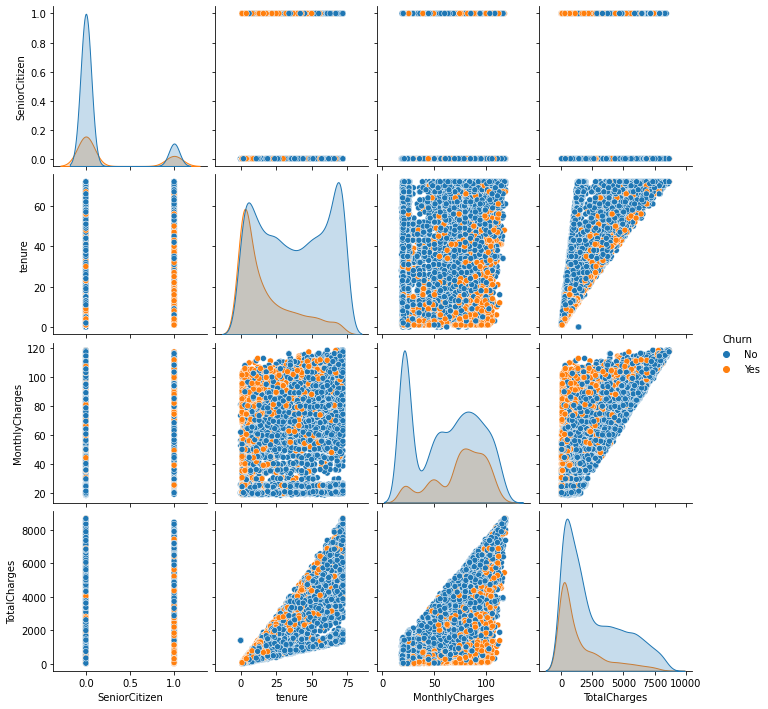

In [ ]:
sns.pairplot(data = df,  hue='Churn')

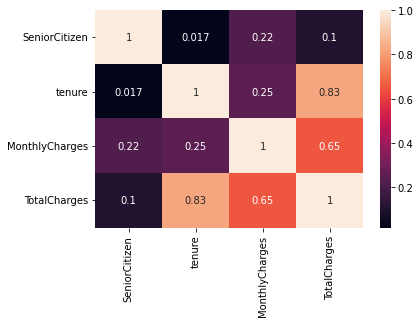

In [ ]:
sns.heatmap(data = (df.corr()), annot = True)

# 4. Data Pre-processing

### 4.1 Categorical Enconding

In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7042,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7043,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7044,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7045,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7046,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [ ]:
df.shape

(7043, 21)

In [ ]:
df= df.drop('customerID', axis=1)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [ ]:
cat_cols =[col for col in df.select_dtypes(['object']).columns if col !='Churn' ]
print(len(cat_cols))

15


In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [ ]:
df_cat = df[cat_cols]
df_cat.shape

(7043, 15)

In [ ]:
ohe = OneHotEncoder()
tranformed = ohe.fit_transform(df_cat).toarray()
col_header = ohe.get_feature_names_out(cat_cols)
df_cat_tranformed = pd.DataFrame(tranformed, columns=col_header)
df_cat_tranformed.shape

(7043, 41)

In [ ]:
df['gender'].head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: gender, dtype: object

In [ ]:
df_cat_tranformed.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### 4.2 Feature Scaling

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
num_cols =[col for col in df.select_dtypes(['float','int']).columns]
print(len(num_cols))
print(num_cols)

4
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [ ]:
df_num = df[num_cols]
df_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [ ]:
mms = MinMaxScaler()
df_scaled= mms.fit_transform(df_num)
df_num_tranformed = pd.DataFrame(df_scaled, columns=num_cols)
df_num_tranformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0.0,0.013889,0.115423,0.001275
1,0.0,0.472222,0.385075,0.215867
2,0.0,0.027778,0.354229,0.010310
3,0.0,0.625000,0.239303,0.210241
4,0.0,0.027778,0.521891,0.015330


### 4.3 Feature Selection

In [ ]:
new_df = pd.concat([df_num_tranformed,df_cat_tranformed,df['Churn']],axis=1)
new_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0.0,0.013889,0.115423,0.001275,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,No
1,0.0,0.472222,0.385075,0.215867,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,No
2,0.0,0.027778,0.354229,0.010310,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Yes
3,0.0,0.625000,0.239303,0.210241,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,No
4,0.0,0.027778,0.521891,0.015330,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Yes


In [ ]:
new_df['Churn']=new_df[['Churn']].replace(to_replace=['Yes','No'],value=[1,0])
new_df['Churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

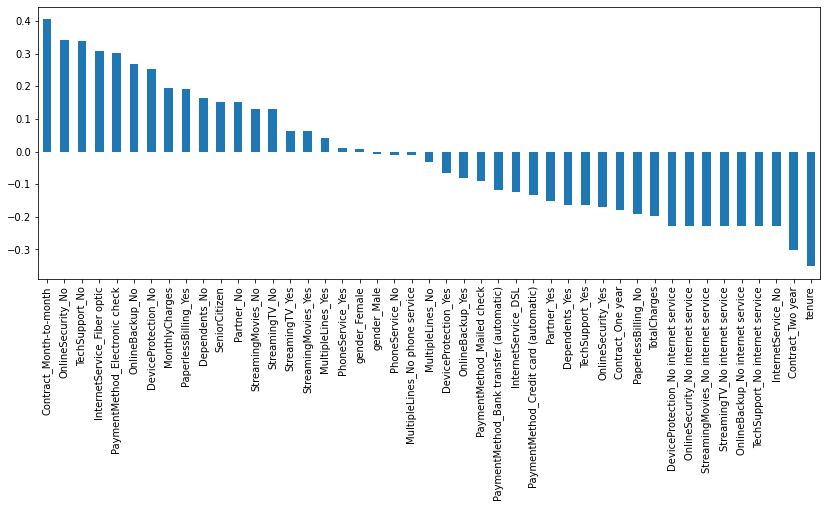

In [ ]:
corr_with_target = new_df.corr()['Churn'].sort_values(ascending=False)
plt.figure(figsize=(14,5))
corr_with_target.drop("Churn").plot.bar()
plt.show()

In [ ]:
relevant_feature=corr_with_target[abs(corr_with_target)>0.1].index
print(len(relevant_feature))
print(relevant_feature)

34
Index(['Churn', 'Contract_Month-to-month', 'OnlineSecurity_No',
       'TechSupport_No', 'InternetService_Fiber optic',
       'PaymentMethod_Electronic check', 'OnlineBackup_No',
       'DeviceProtection_No', 'MonthlyCharges', 'PaperlessBilling_Yes',
       'Dependents_No', 'SeniorCitizen', 'Partner_No', 'StreamingMovies_No',
       'StreamingTV_No', 'PaymentMethod_Bank transfer (automatic)',
       'InternetService_DSL', 'PaymentMethod_Credit card (automatic)',
       'Partner_Yes', 'Dependents_Yes', 'TechSupport_Yes',
       'OnlineSecurity_Yes', 'Contract_One year', 'PaperlessBilling_No',
       'TotalCharges', 'DeviceProtection_No internet service',
       'OnlineSecurity_No internet service',
       'StreamingMovies_No internet service',
       'StreamingTV_No internet service', 'OnlineBackup_No internet service',
       'TechSupport_No internet service', 'InternetService_No',
       'Contract_Two year', 'tenure'],
      dtype='object')


In [ ]:
new_df=new_df[relevant_feature]
new_df.shape

(7043, 34)

### 4.4 Data Splitting

In [ ]:
X = new_df.drop('Churn',axis=1)
print(X.shape)
y = new_df['Churn']

(7043, 33)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size =0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5634, 33), (1409, 33), (5634,), (1409,))

### 4.5 Handling Imbalanced Data

In [ ]:
y_train.value_counts()

0    4139
1    1495
Name: Churn, dtype: int64

In [ ]:
over = RandomOverSampler()
x_over,y_over =over.fit_resample(x_train,y_train)
y_over.value_counts()

1    4139
0    4139
Name: Churn, dtype: int64